# Manning LiveProject

## Detecting Phishing Websites using ML and Python
https://liveproject.manning.com/course/101/detecting-phishing-websites-using-machine-learning-and-python

In [19]:
# Setup
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
# Load data and start exploring it
df = pd.read_csv('Phishing.csv')
df.shape

(11055, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
having_IP_Address              11055 non-null int64
URL_Length                     11055 non-null int64
Shortining_Service             11055 non-null int64
having_At_Symbol               11055 non-null int64
double_slash_redirecting       11055 non-null int64
Prefix_Suffix                  11055 non-null int64
having_Sub_Domain              11055 non-null int64
SSLfinal_State                 11055 non-null int64
Domain_registeration_length    11055 non-null int64
Favicon                        11055 non-null int64
port                           11055 non-null int64
HTTPS_token                    11055 non-null int64
Request_URL                    11055 non-null int64
URL_of_Anchor                  11055 non-null int64
Links_in_tags                  11055 non-null int64
SFH                            11055 non-null int64
Submitting_to_email            11055 non-null int64
Abnorma

# Workflow 

As defined in [Course](https://liveproject.manning.com/module/101_3_1/detecting-phishing-websites-using-machine-learning-and-python/2--further-data-investigation-and-preparing-investigation-reports/2-1--getting-useful-information-from-the-dataset?):

1. You would like to know about the distribution of the websites so as to know what percentage of websites are phishing in the dataset. Use the Result column of the dataset and the Counter Python module to know the class distribution of the websites.

2. A picture is worth a thousand words! Now that you have a DataFrame like the above, convert it to a bar plot using the matplotlib library. Plots are great for communication.

3. Use pandas to extract summary statistics from the data. Investigate closely and see the ranges of the different features, their standard deviation, and so on. This will help you to identify the statistical traits in the data.

4. Investigate the data types and the quantities of the features present in the dataset using methods provided by pandas.

In [17]:
counter = Counter(df.Result.to_list())
result = pd.DataFrame.from_dict(counter, orient='index').reset_index()
result = result.rename(columns={'index':'Class', 0:'Num_Observations'})
result

,Class,Num_Observations
0,-1,4898
1,1,6157


In [56]:
#Better API to Counter and transformation to Dataframe
result = df["Result"].value_counts()
result

 1    6157
-1    4898
Name: Result, dtype: int64

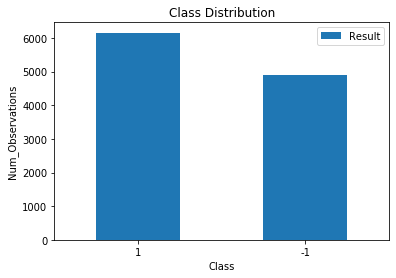

In [42]:
df["Result"].value_counts().plot.bar(x='Class', y='Num_Observations', rot=0)
plt.xlabel('Class')
plt.ylabel('Num_Observations')
plt.title('Class Distribution')
plt.legend()
plt.show()

In [85]:
# Custom Functions for Bar Plot
def label_bars(ax, bars, text_format, **kwargs):
    """
    Attaches a label on every bar of a regular or horizontal bar chart
    """
    ys = [bar.get_y() for bar in bars]
    y_is_constant = all(y == ys[0] for y in ys)  # -> regular bar chart, since all all bars start on the same y level (0)

    if y_is_constant:
        _label_bar(ax, bars, text_format, **kwargs)
    else:
        _label_barh(ax, bars, text_format, **kwargs)


def _label_bar(ax, bars, text_format, **kwargs):
    """
    Attach a text label to each bar displaying its y value
    """
    max_y_value = ax.get_ylim()[1]
    inside_distance = max_y_value * 0.05
    outside_distance = max_y_value * 0.01

    for bar in bars:
        text = text_format.format(bar.get_height())
        text_x = bar.get_x() + bar.get_width() / 2

        is_inside = bar.get_height() >= max_y_value * 0.15
        if is_inside:
            color = "white"
            text_y = bar.get_height() - inside_distance
        else:
            color = "black"
            text_y = bar.get_height() + outside_distance

        ax.text(text_x, text_y, text, ha='center', va='bottom', color=color, **kwargs)


def _label_barh(ax, bars, text_format, **kwargs):
    """
    Attach a text label to each bar displaying its y value
    Note: label always outside. otherwise it's too hard to control as numbers can be very long
    """
    max_x_value = ax.get_xlim()[1]
    distance = max_x_value * 0.0025

    for bar in bars:
        text = text_format.format(bar.get_width())

        text_x = bar.get_width() + distance
        text_y = bar.get_y() + bar.get_height() / 2

        ax.text(text_x, text_y, text, va='center', **kwargs)

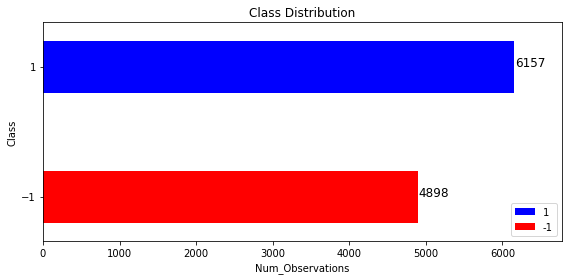

In [156]:
# Need Result to be Dataframe to show Barplot with different colored bars
result = df["Result"].value_counts().to_frame().reset_index()
result = result.rename(columns={'index':'Class', 'Result':'Num_Observations'})
# print(result)

plt.figure(figsize=(8,4))

blue_bar = plt.barh(result['Class'][0], result['Num_Observations'][0], color='b', label='1')
red_bar = plt.barh(result['Class'][1], result['Num_Observations'][1], color='r', label='-1')

plt.xlabel('Num_Observations')
plt.ylabel('Class')
plt.yticks([-1,1])
plt.title('Class Distribution')
plt.legend(loc="best")
# plt.legend([blue_bar, red_bar], result.Class, loc="center") # When label param is not added to barh!

# Use plt.text() to put text in the plot.
# plt.text() , you need to give plt.text(x_pos, y_pos, "text on plot") for location , 
# where you want to put the numbers, so here index will give you x pos and data+1 will provide a little gap in y axis.
z = result[['Class', 'Num_Observations']].itertuples(index=False, name=None)
lst = list(z)
# for (y,x) in lst:
#     plt.text(x=x/2 , y=y , s=x, color='white', fontsize=20, ha='center', va='center')

for (y,x) in lst:
    plt.text(x=x+5 , y=y , s=x, fontsize=12)

plt.margins(0.1) # Add margin to fit text within the plot
plt.tight_layout()
plt.show()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
having_IP_Address              11055 non-null int64
URL_Length                     11055 non-null int64
Shortining_Service             11055 non-null int64
having_At_Symbol               11055 non-null int64
double_slash_redirecting       11055 non-null int64
Prefix_Suffix                  11055 non-null int64
having_Sub_Domain              11055 non-null int64
SSLfinal_State                 11055 non-null int64
Domain_registeration_length    11055 non-null int64
Favicon                        11055 non-null int64
port                           11055 non-null int64
HTTPS_token                    11055 non-null int64
Request_URL                    11055 non-null int64
URL_of_Anchor                  11055 non-null int64
Links_in_tags                  11055 non-null int64
SFH                            11055 non-null int64
Submitting_to_email            11055 non-null int64
Abnorma

In [169]:
# Showing first few columns from a dataframe
# df.iloc[:,0:11].describe().T
df.loc[:,'having_IP_Address':'port'].describe().T

,count,mean,std,min,25%,50%,75%,max
having_IP_Address,11055.0,0.313795,0.949534,-1.0,-1.0,1.0,1.0,1.0
URL_Length,11055.0,-0.633198,0.766095,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,11055.0,0.738761,0.673998,-1.0,1.0,1.0,1.0,1.0
having_At_Symbol,11055.0,0.700588,0.713598,-1.0,1.0,1.0,1.0,1.0
double_slash_redirecting,11055.0,0.741474,0.671011,-1.0,1.0,1.0,1.0,1.0
Prefix_Suffix,11055.0,-0.734962,0.678139,-1.0,-1.0,-1.0,-1.0,1.0
having_Sub_Domain,11055.0,0.063953,0.817518,-1.0,-1.0,0.0,1.0,1.0
SSLfinal_State,11055.0,0.250927,0.911892,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,11055.0,-0.336771,0.941629,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11055.0,0.628584,0.777777,-1.0,1.0,1.0,1.0,1.0


In [187]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
having_IP_Address,1,-0.052,0.4,0.16,0.4,-0.0053,-0.081,0.071,-0.023,0.087,0.061,0.36,0.03,0.1,0.0062,-0.011,0.078,0.34,-0.32,0.084,0.043,0.097,0.055,-0.01,-0.051,0.0029,-0.092,0.029,-0.34,-0.019,0.094
URL_Length,-0.052,1,-0.098,-0.075,-0.081,0.055,0.004,0.049,-0.22,-0.042,0.00032,-0.089,0.25,-0.023,0.053,0.41,-0.014,-0.11,0.047,-0.045,-0.014,-0.049,-0.014,0.18,-0.041,0.009,0.18,0.0029,-0.023,-0.067,0.057
Shortining_Service,0.4,-0.098,1,0.1,0.84,-0.08,-0.042,-0.061,0.061,0.0061,0.0022,0.76,-0.037,0.00056,-0.13,-0.023,0.049,0.74,-0.53,0.062,0.038,0.037,0.017,-0.053,0.44,-0.047,0.015,0.16,-0.2,0.085,-0.068
having_At_Symbol,0.16,-0.075,0.1,1,0.087,-0.012,-0.059,0.031,0.016,0.3,0.36,0.1,0.028,0.058,-0.071,-0.0087,0.37,0.2,-0.028,0.28,0.22,0.29,0.28,-0.0055,-0.048,0.033,-0.065,0.037,-0.0061,-0.08,0.053
double_slash_redirecting,0.4,-0.081,0.84,0.087,1,-0.086,-0.043,-0.036,0.047,0.035,0.025,0.76,-0.026,-0.005,-0.13,-0.042,0.032,0.72,-0.59,0.087,0.026,0.054,0.01,-0.05,0.43,-0.062,-0.0031,0.18,-0.19,0.07,-0.039
Prefix_Suffix,-0.0053,0.055,-0.08,-0.012,-0.086,1,0.088,0.26,-0.097,-0.0075,-0.023,-0.07,0.099,0.35,0.1,0.0013,-0.045,-0.078,0.016,0.013,-0.025,-0.015,-0.037,0.074,-0.017,0.11,-0.0068,0.068,0.067,-0.0028,0.35
having_Sub_Domain,-0.081,0.004,-0.042,-0.059,-0.043,0.088,1,0.27,-0.083,-0.017,0.0049,-0.037,0.1,0.23,0.094,0.096,0.0088,-0.035,0.031,-0.018,0.018,-0.025,0.011,0.12,0.13,-0.0058,0.12,0.058,-0.011,0.082,0.3
SSLfinal_State,0.071,0.049,-0.061,0.031,-0.036,0.26,0.27,1,-0.19,-0.015,0.027,-0.03,0.19,0.54,0.18,0.17,0.0081,-0.046,-0.021,0.024,0.016,-0.013,-0.0028,0.16,0.051,0.26,0.075,0.096,-0.012,0.063,0.71
Domain_registeration_length,-0.023,-0.22,0.061,0.016,0.047,-0.097,-0.083,-0.19,1,0.054,0.022,0.059,-0.61,-0.16,-0.1,-0.14,0.039,0.058,-0.016,0.024,0.024,0.051,0.0044,-0.063,-0.01,-0.13,-0.06,-0.04,0.12,-0.0022,-0.23
Favicon,0.087,-0.042,0.0061,0.3,0.035,-0.0075,-0.017,-0.015,0.054,1,0.8,0.049,-0.0046,0.038,-0.1,-0.012,0.67,0.072,-0.016,0.71,0.41,0.94,0.63,-0.0026,0.088,-0.051,0.012,-0.017,-0.13,0.3,-0.00028


In [182]:
type(corr.style)

pandas.io.formats.style.Styler